<a href="https://colab.research.google.com/github/jeojildo/fundamentos-int-comp-ciencia-dados/blob/main/Atividade2_1_Linear_Regression_and_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2.1 LINEAR REGRESSION AND METRICS




---



**Fundamentos Inteligência Computacional e Ciência de Dados**



---



Discente: Jeojildo Pereira


Matricula: 202220070022


Docente: Prof. Dr. Claudomiro de Sousa de Sales Junior



---


# A .: Pergunta 1 : Faça Boxplots :.

---


# Instruções:


---


Com o mesmo dataset da Atividade 2, faça boxplots de duas features do dataset, conforme procedimento mostrado em sala. Para cada boxplot calcule:
*   CV
*   Curtose
*   Skewness
*   Mean
*   Moda

Analise os resultados.

Para um desses boxplots, introduza artificialmente outliers e verifique o que ocorre com o boxplot e essas métricas.

Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

import pandas as pd
dadosiris = pd.read_csv('https://raw.githubusercontent.com/jeojildo/fundamentos-int-comp-ciencia-dados/refs/heads/main/Iris.csv')
df = pd.DataFrame(dadosiris)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [118]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


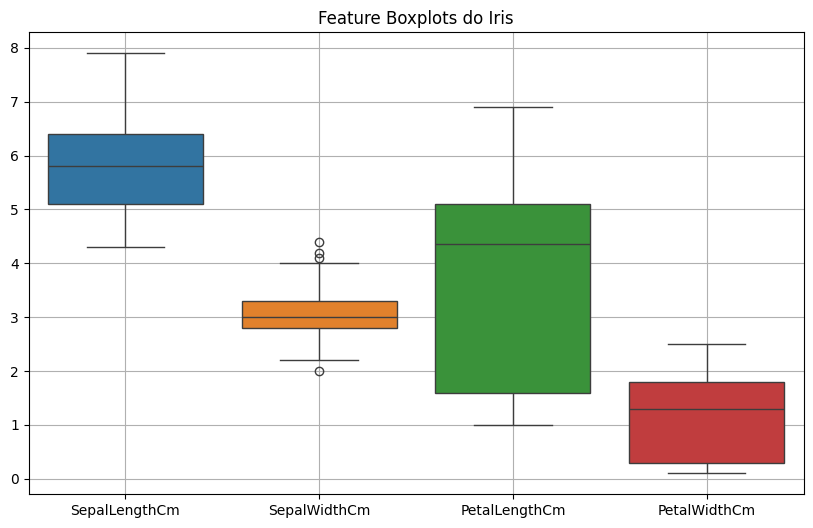

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 1:5])  # Evite a primeira coluna Id
plt.title('Feature Boxplots do Iris')
plt.grid(True)
plt.show()

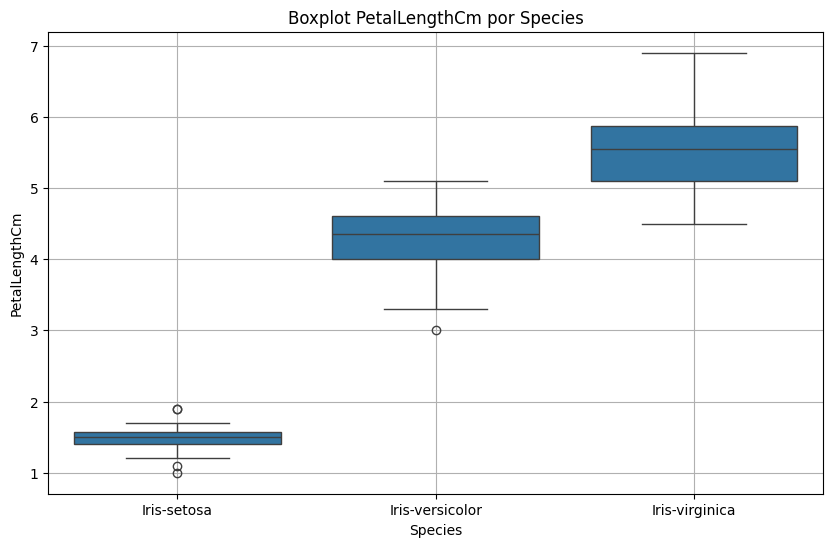

In [120]:
# Boxplot feature baseando tipo de species PetalLengthCm
plt.figure(figsize=(10, 6)) #L=12, A=8
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.grid(True)
plt.title('Boxplot PetalLengthCm por Species')
plt.show()

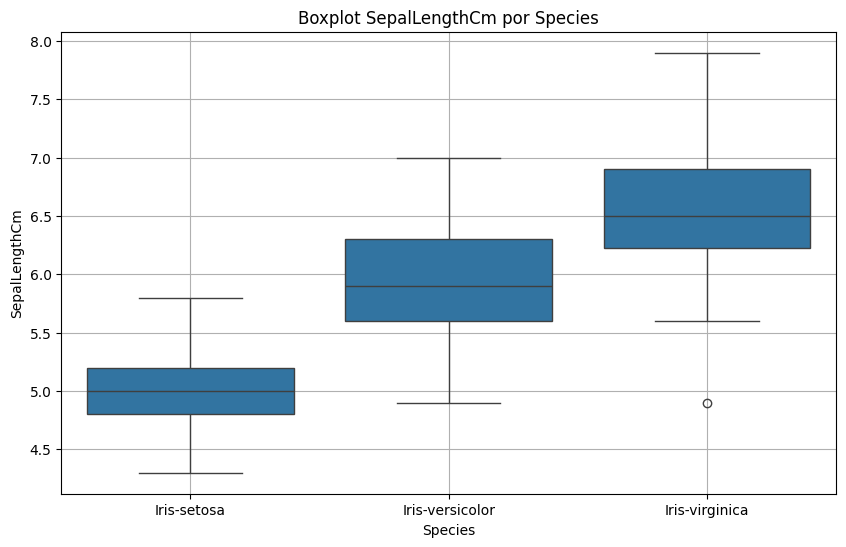

In [121]:
# Boxplot feature baseando tipo de species SepalLengthCm
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.grid(True)
plt.title('Boxplot SepalLengthCm por Species')
plt.show()

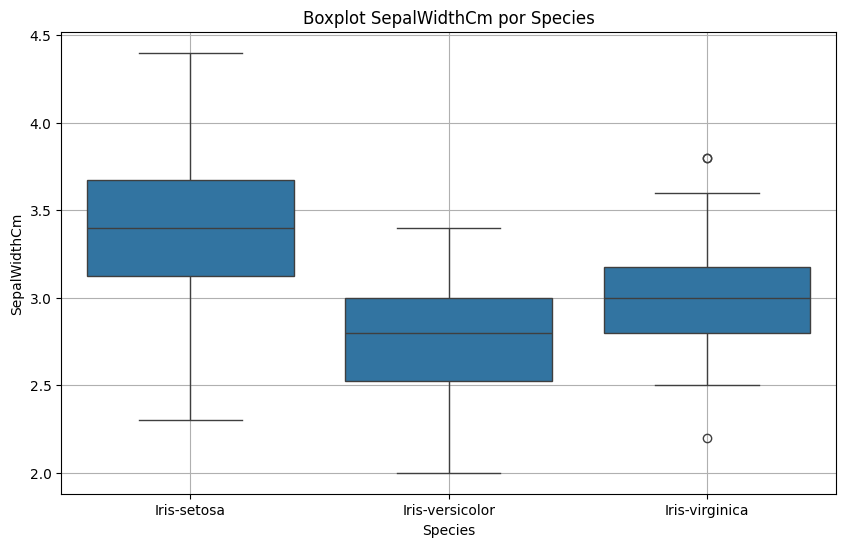

In [122]:
# Boxplot feature baseando tipo de species SepalWidthCm
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.grid(True)
plt.title('Boxplot SepalWidthCm por Species')
plt.show()

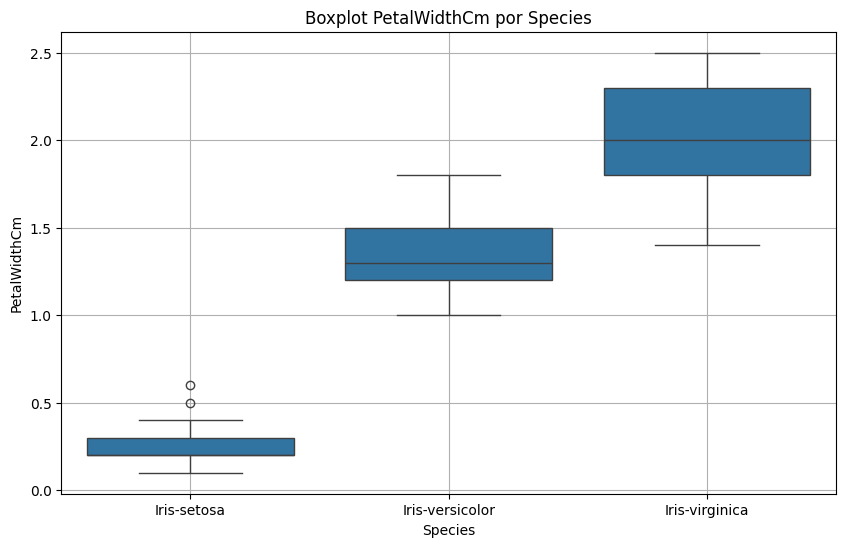

In [123]:
# Boxplot feature baseando tipo de species PetalWidthCm
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.grid(True)
plt.title('Boxplot PetalWidthCm por Species')
plt.show()

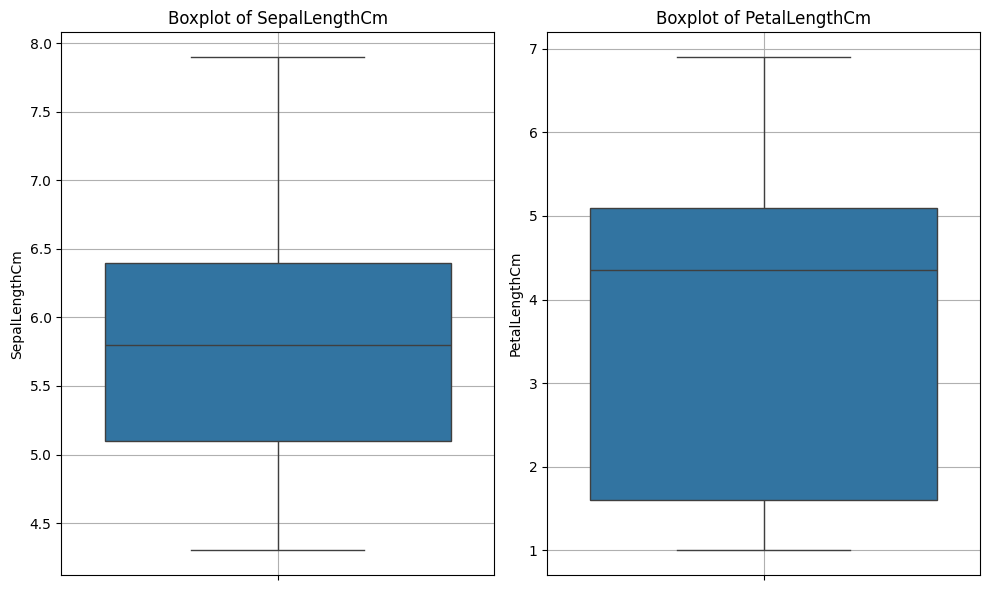


 Calcula estatistica por SepalLengthCm:
-> Média(Mean): 5.84
-> Coefficient of variation(cv): 14.17
-> Kurtosis: -0.57
-> Skewness: 0.31
-> Mode: 5.0 (occurrences: 10)

 Calcula estatistica por PetalLengthCm:
-> Média(Mean): 3.76
-> Coefficient of variation(cv): 46.94
-> Kurtosis: -1.40
-> Skewness: -0.27
-> Mode: 1.5 (occurrences: 14)


In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, mode


df = pd.read_csv('https://raw.githubusercontent.com/jeojildo/fundamentos-int-comp-ciencia-dados/refs/heads/main/Iris.csv')

# Selecionar duas features: SepalLengthCm e PetalLengthCm
features = ['SepalLengthCm', 'PetalLengthCm']

#Cria Boxplots das duas features
plt.figure(figsize=(10, 6))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
plt.tight_layout()
plt.show()


# Calcular para cada feature
for feature in features:
    values = df[feature]
    mean_val = values.mean()
    std_val = values.std()
    cv = std_val / mean_val *100
    kurt = kurtosis(values)
    skewness = skew(values)
    mode_result = mode(values, keepdims=False)

    print("=============================================")
    print(f"\n Calcula estatistica por {feature}:")
    print("=============================================")
    print(f"-> Média(Mean): {mean_val:.2f}")
    print(f"-> Coefficient of variation(cv): {cv:.2f}")
    print(f"-> Kurtosis: {kurt:.2f}")
    print(f"-> Skewness: {skewness:.2f}")
    print(f"-> Mode: {mode_result.mode} (occurrences: {mode_result.count})")


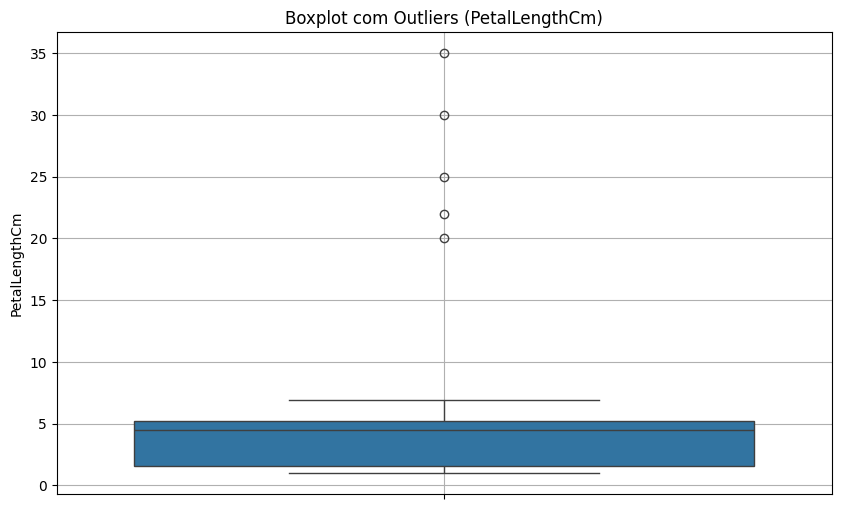


 Calcular estatística outliers para PetalLengthCm:
-> Média (Mean): 4.59
-> Coeficiente de variação (CV): 0.98
-> Curtose: 22.86
-> Skewness: 4.42
-> Moda: 1.5 (ocorrências: 13)


In [125]:
# Adicionar outliers
df_outlier = df.copy()
df_outlier.loc[0:4, 'PetalLengthCm'] = [20, 22, 25, 30, 35]  # valores extremos

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_outlier['PetalLengthCm'])
plt.title('Boxplot com Outliers (PetalLengthCm)')
plt.grid(True)
plt.show()

# Calcular estatísticas outliers
data_out = df_outlier['PetalLengthCm']
mean_out = data_out.mean()
std_out = data_out.std()
cv_out = std_out / mean_out
kurt_out = kurtosis(data_out)
skew_out = skew(data_out)
moda_out = mode(data_out, keepdims=False)

print("=======================================================")
print(f"\n Calcular estatística outliers para PetalLengthCm:")
print("=======================================================")
print(f"-> Média (Mean): {mean_out:.2f}")
print(f"-> Coeficiente de variação (CV): {cv_out:.2f}")
print(f"-> Curtose: {kurt_out:.2f}")
print(f"-> Skewness: {skew_out:.2f}")
print(f"-> Moda: {moda_out.mode} (ocorrências: {moda_out.count})")

# B .: Pergunta 2 : Linear Regression :.

---


# Instruções:


---

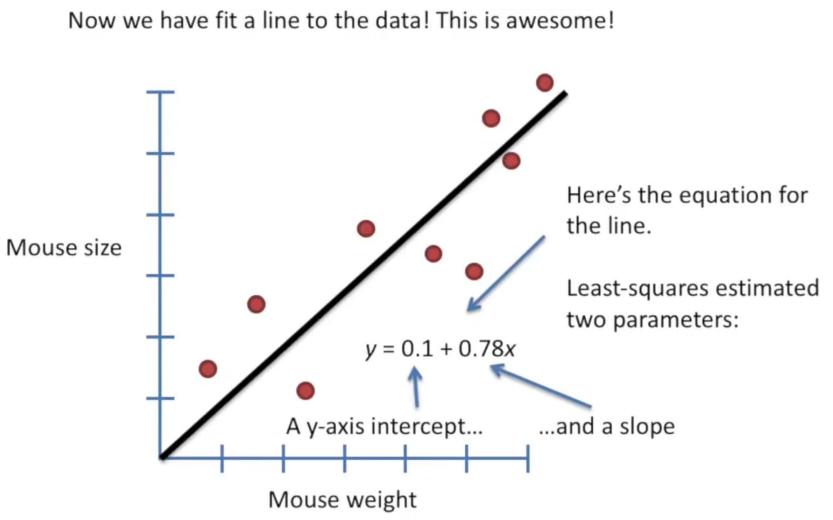

Reproduza o mais próximo possível o exemplo do slide anterior. Em seguida, aplique o linear regression do scikit-learn. Use a biblioteca import “statsmodels.api as sm” para gerar a estatísticas da regressão linear. A partir do b obtido, use 6 diferentes a’s para plotar diferentes retas, mostrando a variação na rotação e gere também o gráfico a seguir:

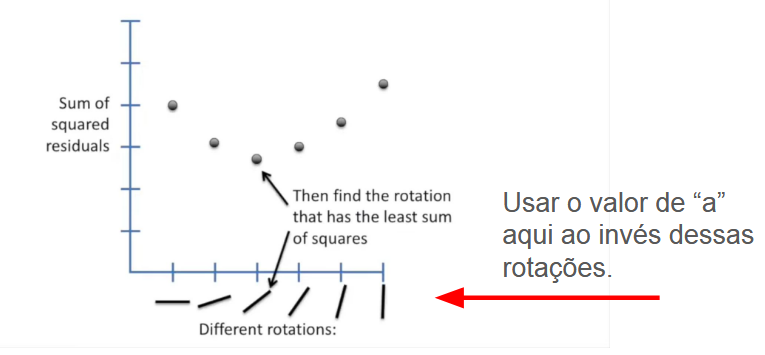

Calcule o R-Squared para cada ‘a’ e compare com o melhor obtido pelo scikit-learn.

Análise também:


*   R-squared
*   Adj. R-squared
*   Prob (F.statistic)
*   P-value

In [126]:
#Linear regression exemplo

from sklearn.linear_model import LinearRegression
import numpy as np

#dados
x = np.array([[1], [2], [3], [4], [5]])  # variavel independen
y = np.array([2, 4, 5, 4, 5])            # variavel dependen

#modelo
model = LinearRegression()
model.fit(x, y)

# Coefisiente e intercept
print("Slope (b):", model.coef_[0])
print("Intercept (a):", model.intercept_)

#predição
x_new = np.array([[6]])
y_pred = model.predict(x_new)
print("Predição y for x=6:", y_pred[0])

Slope (b): 0.6
Intercept (a): 2.2
Predição y for x=6: 5.8


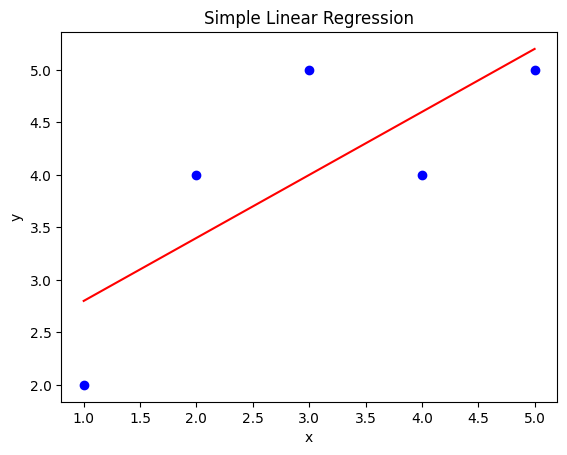

In [127]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')  # linear regression line
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.show()

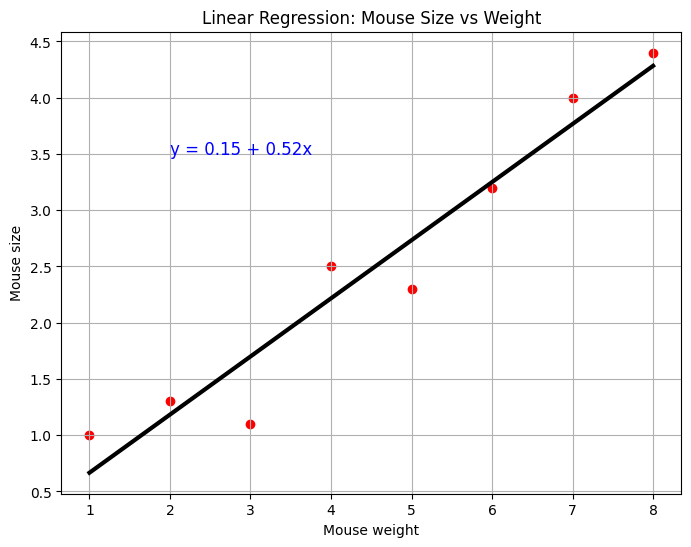

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.70
Date:                Fri, 23 May 2025   Prob (F-statistic):           0.000103
Time:                        07:36:53   Log-Likelihood:                -2.2562
No. Observations:                   8   AIC:                             8.512
Df Residuals:                       6   BIC:                             8.671
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1500      0.289      0.520      0.6

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.



In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#dados
x = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = np.array([1.0, 1.3, 1.1, 2.5, 2.3, 3.2, 4.0, 4.4])

#regressão
model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_

#predição dos valores de y
y_pred = model.predict(x)

#grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red')
plt.plot(x, y_pred, color='black', linewidth=3)
plt.title("Linear Regression: Mouse Size vs Weight")
plt.xlabel("Mouse weight")
plt.ylabel("Mouse size")


eq_text = f"y = {intercept:.2f} + {slope:.2f}x"
plt.text(2, 3.5, eq_text, fontsize=12, color="blue")

plt.grid(True)
plt.show()

#estatísticas com statsmodels
x_with_const = sm.add_constant(x)
model_sm = sm.OLS(y, x_with_const)
results = model_sm.fit()

print(results.summary())

In [88]:
pip install numpy matplotlib scikit-learn statsmodels

Best slope (a): 0.3405
Intercept (b): 0.5679
R-squared: 0.9363
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     88.21
Date:                Fri, 23 May 2025   Prob (F-statistic):           8.27e-05
Time:                        07:37:02   Log-Likelihood:                 1.3865
No. Observations:                   8   AIC:                             1.227
Df Residuals:                       6   BIC:                             1.386
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.



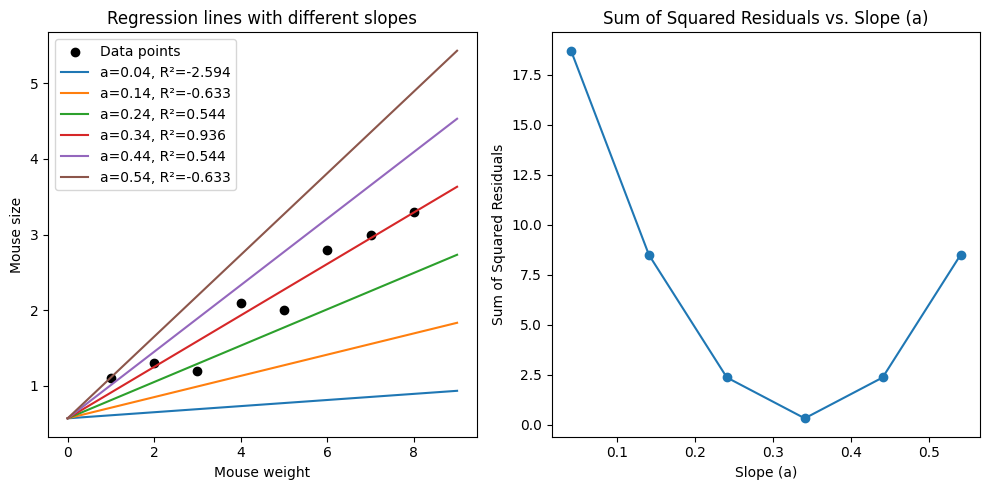

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


#dados
X = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = np.array([1.1, 1.3, 1.2, 2.1, 2.0, 2.8, 3.0, 3.3])

#ajuste o modelo de regressão ideal usando scikit-learn
model = LinearRegression()
model.fit(X, y)

a_best = model.coef_[0]
b_best = model.intercept_
r2_best = model.score(X, y)

print(f"Best slope (a): {a_best:.4f}")
print(f"Intercept (b): {b_best:.4f}")
print(f"R-squared: {r2_best:.4f}")


#ajuste com statsmodels para obter um resumo completo
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())


#tentar com diferentes inclinações (a), mantendo b constante
a_values = [a_best - 0.3, a_best - 0.2, a_best - 0.1, a_best, a_best + 0.1, a_best + 0.2]
ssr_list = []
r2_list = []

plt.figure(figsize=(10, 5))

#plota as diferentes retas de regressão
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='black', label="Data points")
x_line = np.linspace(0, 9, 100)

for a in a_values:
    y_line = b_best + a * x_line
    y_pred = b_best + a * X.flatten()
    ssr = np.sum((y - y_pred)**2)
    ssr_list.append(ssr)

    # Calcular R-squared
    ss_total = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ssr / ss_total)
    r2_list.append(r2)

    plt.plot(x_line, y_line, label=f"a={a:.2f}, R²={r2:.3f}")

plt.title("Regression lines with different slopes")
plt.xlabel("Mouse weight")
plt.ylabel("Mouse size")
plt.legend()

# Plot SSR vs slope a
plt.subplot(1, 2, 2)
plt.plot(a_values, ssr_list, marker='o')
plt.title("Sum of Squared Residuals vs. Slope (a)")
plt.xlabel("Slope (a)")
plt.ylabel("Sum of Squared Residuals")

plt.tight_layout()
plt.show()